In [84]:
#pip install opencv-python

In [85]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [86]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [87]:
import cv2
import imghdr

In [88]:
data_dir = 'data'
img_exts = ['jpg', 'jpeg', 'bmp', 'png']

In [89]:
for img_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, img_class)):
    image_path = os.path.join(data_dir, img_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in img_exts:
        print('Image not in exts list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))

In [90]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 236 files belonging to 2 classes.


In [91]:
data_iterator = data.as_numpy_iterator()

In [92]:
batch = data_iterator.next()

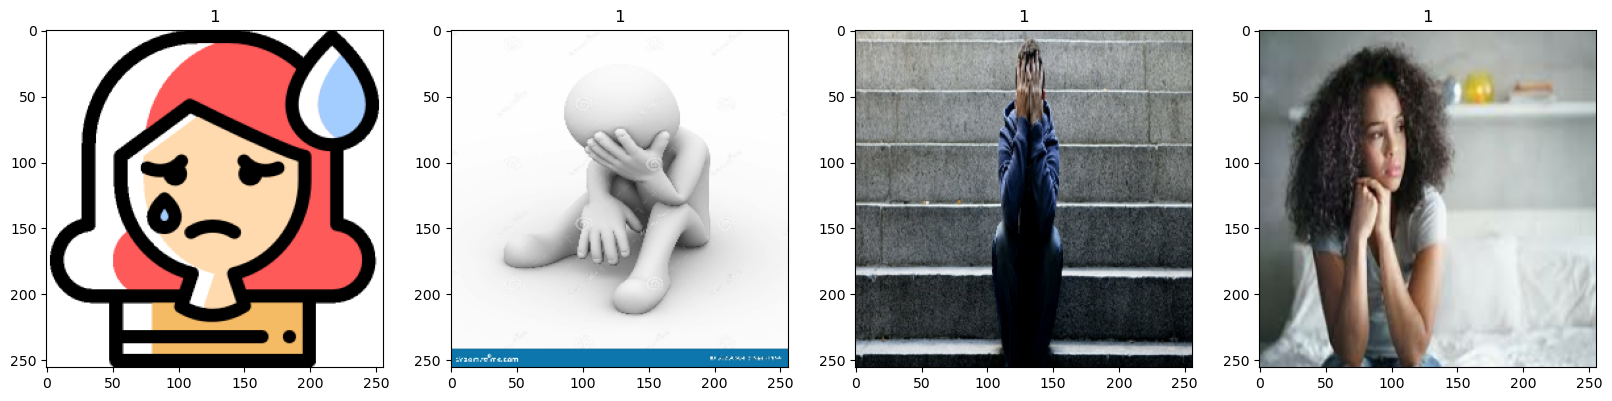

In [93]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [94]:
#scale

data = data.map(lambda x, y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.01176471, 0.03534007, 0.04719669],
          [0.01568628, 0.0627451 , 0.07843138],
          [0.0481924 , 0.25157782, 0.31591606],
          ...,
          [0.18777573, 0.929182  , 0.99215686],
          [0.1882353 , 0.93333334, 0.9882353 ],
          [0.18431373, 0.9372549 , 0.99215686]],
 
         [[0.01969975, 0.07455576, 0.0786152 ],
          [0.04313726, 0.1764706 , 0.21960784],
          [0.10795037, 0.51230085, 0.6407782 ],
          ...,
          [0.18408395, 0.929182  , 0.99215686],
          [0.18431373, 0.92941177, 0.99215686],
          [0.18431373, 0.93333334, 0.99215686]],
 
         [[0.08632047, 0.39644608, 0.4984528 ],
          [0.11372549, 0.5568628 , 0.69411767],
          [0.12987132, 0.6491268 , 0.8145221 ],
          ...,
          [0.18431373, 0.91764706, 0.9882353 ],
          [0.18431373, 0.91764706, 0.9882353 ],
          [0.18039216, 0.92156863, 0.9882353 ]],
 
         ...,
 
         [[0.14897366, 0.7058364 , 0.88235295],
          [0.14509

In [95]:
# Split Data

train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2) + 1
test_size = int(len(data) * 0.1) + 1

In [96]:
train_size

5

In [97]:
test_size

1

In [98]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [99]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [100]:
test

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [101]:
model = tf.keras.models.Sequential()

In [102]:
# model.add(tf.keras.layers.Conv2D(16, (3, 3), 1, activation='relu', input_shape = (256, 256, 3)))
# model.add(tf.keras.layers.MaxPooling2D())
# model.add(tf.keras.layers.Conv2D(32, (3, 3), 1, activation = 'relu'))
# model.add(tf.keras.layers.MaxPooling2D())
# model.add(tf.keras.layers.Conv2D(16, (3, 3), 1, activation = 'relu'))
# model.add(tf.keras.layers.MaxPooling2D())
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(256, activation='relu'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [103]:
model.add(tf.keras.layers.Input(shape=(256, 256, 3)))
# model.add(tf.keras.layers.Conv2D(128, (3, 3), 1, activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(16, (3, 3), 1, activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(32, (3, 3), 1, activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(16, (3, 3), 1, activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [104]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [105]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)       

In [106]:
logdir='logs'

In [107]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [108]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 10s 2s/step - loss: 0.7248 - accuracy: 0.5125 - val_loss: 0.5624 - val_accuracy: 0.7031
Epoch 2/20
5/5 [==============================] - 9s 2s/step - loss: 0.6618 - accuracy: 0.5375 - val_loss: 0.6361 - val_accuracy: 0.6562
Epoch 3/20
5/5 [==============================] - 8s 2s/step - loss: 0.5698 - accuracy: 0.7375 - val_loss: 0.4684 - val_accuracy: 0.8281
Epoch 4/20
5/5 [==============================] - 8s 2s/step - loss: 0.4394 - accuracy: 0.8438 - val_loss: 0.3365 - val_accuracy: 0.9219
Epoch 5/20
5/5 [==============================] - 8s 1s/step - loss: 0.3192 - accuracy: 0.9000 - val_loss: 0.2631 - val_accuracy: 0.9219
Epoch 6/20
5/5 [==============================] - 9s 2s/step - loss: 0.2353 - accuracy: 0.9187 - val_loss: 0.2805 - val_accuracy: 0.9531
Epoch 7/20
5/5 [==============================] - 9s 2s/step - loss: 0.2451 - accuracy: 0.9312 - val_loss: 0.0881 - val_accuracy: 0.9844
Epoch 8/20
5/5 [========================

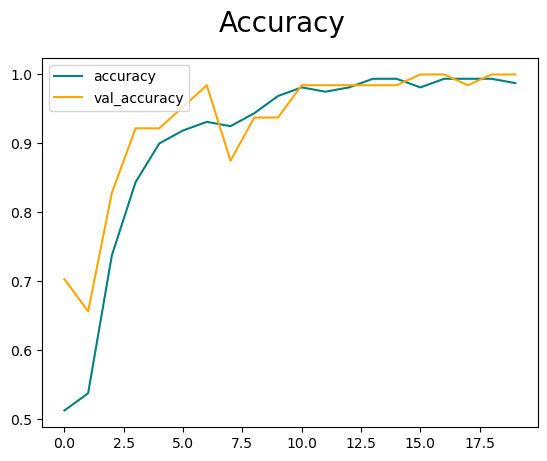

In [109]:
fig = plt.figure()

plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

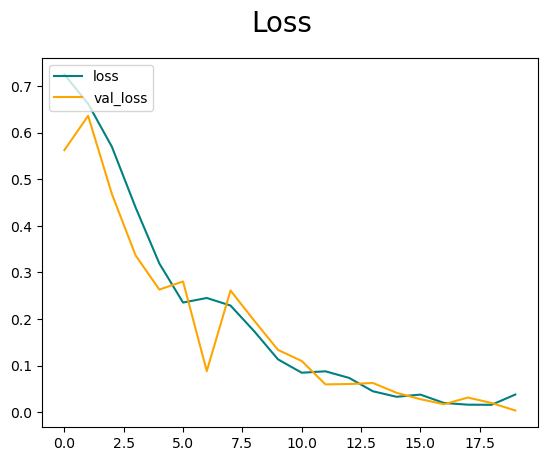

In [110]:
fig = plt.figure()

plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [111]:
#Evaluate

pre = tf.keras.metrics.Precision()
re = tf.keras.metrics.Recall()
acc = tf.keras.metrics.BinaryAccuracy()

In [112]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 172ms/step


In [113]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


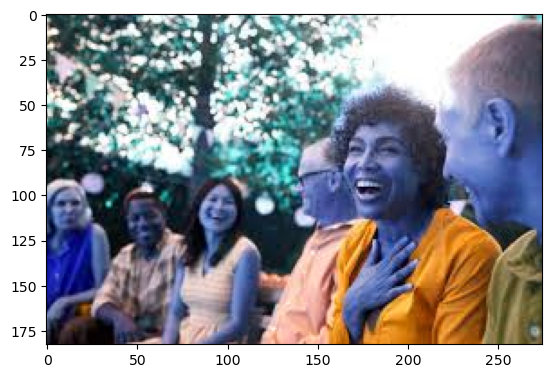

In [114]:
img = cv2.imread('hp_test.jpg')
plt.imshow(img)
plt.show()

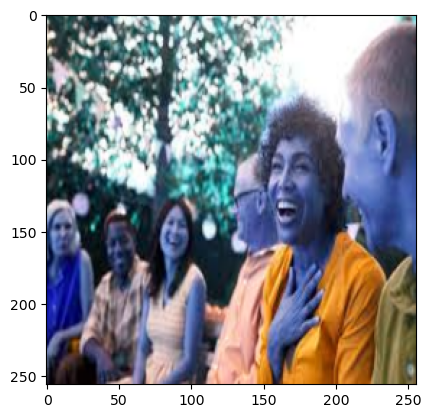

In [115]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [116]:
resize.shape

TensorShape([256, 256, 3])

In [117]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 31ms/step


In [118]:
yhat

array([[2.861517e-05]], dtype=float32)

In [121]:
if yhat > 0.5:
    print('Preeicted class is Sad')
else:
    print('Predicted class is Happy')

Predicted class is Happy
